In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
members = pd.read_csv('data/NSS_GreatCare_Members.csv')
admissions = pd.read_csv('data/NSS_Hospital_Inpatient_Admissions.csv')
primary = pd.read_csv('data/NSS_PrimaryCare_Office_Visits.csv')

C:\Users\rhilb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
admissions.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.518046e+09,1992818256,2015-03-11,2015-03-14,0,0,2.0,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0


In [5]:
hospital_visits_by_patient = admissions['Patient ID'].value_counts()
hospital_visits_by_patient

DS1|3812     17
DS1|26751    15
DS1|53241    13
DS1|10451    12
DS1|12422    11
             ..
DS1|20740     1
DS1|28995     1
DS1|35964     1
DS1|17393     1
DS1|59072     1
Name: Patient ID, Length: 4701, dtype: int64

In [6]:
hospital_visits_by_patient.max()

17

# #1

In [7]:
# change to datetimes
admissions['Encounter Start Date'] = pd.to_datetime(admissions['Encounter Start Date'])
admissions['Encounter End Date'] = pd.to_datetime(admissions['Encounter End Date'])
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.518046e+09,1992818256,2015-03-11,2015-03-14,0,0,2.0,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0


In [8]:
# sort by patient id and encounter start date so that repeated patients are stacked in order
admissions.sort_values(["Patient ID", 'Encounter Start Date'], inplace=True)
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0


In [9]:
# calculate the difference between start & end dates for each row to the row above it to find number of days between start dates
# this will include several values that are unhelpful because if a row does not represent a readmission, this difference
# will be nonsensical, but those values will be dropped later
admissions['start_date_diff'] = admissions['Encounter Start Date'].diff()
admissions['end_date_diff'] = admissions['Encounter End Date'].diff()
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days


In [10]:
# calculate the length of stay for each hospital visit
admissions['length_of_stay'] = admissions['Encounter End Date'] - admissions['Encounter Start Date']
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT,3 days
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days,2 days
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days,3 days


In [11]:
# calculate the length between end date and start date
admissions['length_between'] = admissions['end_date_diff'] - admissions['length_of_stay']
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT,3 days,NaT
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days,-155 days
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days,-211 days
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days,-188 days
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days,2 days,468 days
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days,3 days,1 days


In [12]:
# clean patient ID
patient_id = admissions['Patient ID'].str.split('|', expand=True)
patient_id

,0,1
117,DS1,10
0,DS1,10033
1,DS1,10043
2,DS1,10073
3,DS1,10101
...,...,...
6208,DS1,9979
6209,DS1,9981
6210,DS1,9994
6211,DS1,9994


In [13]:
admissions['patient_id_clean'] = patient_id[1]
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT,3 days,NaT,10
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days,-155 days,10033
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days,10043
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days,10073
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days,10101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days,-211 days,9979
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days,-188 days,9981
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days,2 days,468 days,9994
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days,3 days,1 days,9994


In [14]:
admissions['patient_id_clean'] = pd.to_numeric(admissions['patient_id_clean'])

In [15]:
# calculate difference between patient ID for subsequent rows 
# anytime this value is nonzero will not be a readmission since it is sorted by patient ID
admissions['patient_id_diff'] = admissions['patient_id_clean'].diff()
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT,3 days,NaT,10,NaN
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days,-155 days,10033,10023.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days,10043,10.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days,10073,30.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days,10101,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days,-211 days,9979,1.0
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days,-188 days,9981,2.0
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days,2 days,468 days,9994,13.0
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days,3 days,1 days,9994,0.0


In [16]:
# create 0 day and 30 day datetime columns b/c I don't know how to compare datetimes to integers
admissions['ex_date1'] = '2012-09-01'
admissions['ex_date1'] = pd.to_datetime(admissions['ex_date1'])
admissions['ex_date2'] = '2012-10-01'
admissions['ex_date2'] = pd.to_datetime(admissions['ex_date2'])
admissions['thirty_days'] = admissions['ex_date2'] - admissions['ex_date1']
admissions['zero_days'] = admissions['ex_date1'] - admissions['ex_date1']
admissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days
117,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,NaT,NaT,3 days,NaT,10,NaN,2012-09-01,2012-10-01,30 days,0 days
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days,-155 days,10033,10023.0,2012-09-01,2012-10-01,30 days,0 days
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days,10043,10.0,2012-09-01,2012-10-01,30 days,0 days
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days,10073,30.0,2012-09-01,2012-10-01,30 days,0 days
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days,10101,28.0,2012-09-01,2012-10-01,30 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days,-211 days,9979,1.0,2012-09-01,2012-10-01,30 days,0 days
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days,-188 days,9981,2.0,2012-09-01,2012-10-01,30 days,0 days
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,471 days,470 days,2 days,468 days,9994,13.0,2012-09-01,2012-10-01,30 days,0 days
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,3 days,4 days,3 days,1 days,9994,0.0,2012-09-01,2012-10-01,30 days,0 days


In [17]:
# filter out cases where length between is not between 0 and 30
readmissions = admissions[admissions['length_between'] >= admissions['zero_days']]
readmissions = readmissions[readmissions['length_between'] <= readmissions['thirty_days']]
# filter out cases where it is not readmission b/c patient_id_diff doesn't equal 0
readmissions = readmissions[readmissions['patient_id_diff'] == 0]
readmissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days
45,HIA|DS1|10451|DS1|NPI|1902844988|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1902844988,DS1|NPI|1811123151,1.811123e+09,1902844988,2013-03-27,2013-04-16,1,1,1.0,1,70,21.0,571.1,Acute alcoholic hepatitis,NaN,NaN,0,17978.94,250.0,7 days,24 days,20 days,4 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days
37,HIA|DS1|10451|DS1|NPI|1427055839|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1427344951,1.427345e+09,1427055839,2013-04-16,2013-04-26,0,0,2.0,4,6,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,54450.00,50.0,20 days,10 days,10 days,0 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days
38,HIA|DS1|10451|DS1|NPI|1427055839|2,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1073566931,1.073567e+09,1427055839,2013-05-01,2013-05-09,1,0,1.0,1,6,23.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,51700.00,0.0,15 days,13 days,8 days,5 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days
40,HIA|DS1|10451|DS1|NPI|1427055839|4,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1679541775,1.679542e+09,1427055839,2013-07-26,2013-08-03,0,0,1.0,1,6,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,59395.00,0.0,31 days,33 days,8 days,25 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days
41,HIA|DS1|10451|DS1|NPI|1427055839|5,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1215189550,1.215190e+09,1427055839,2013-08-31,2013-09-02,0,0,3.0,2,1,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,27653.05,0.0,36 days,30 days,2 days,28 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,DS1|9809,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1821297797,1.821298e+09,1689608150,2013-01-20,2013-01-24,0,0,2.0,1,1,21.0,NaN,NaN,I48.0,Paroxysmal atrial fibrillation,0,10721.07,250.0,11 days,13 days,4 days,9 days,9809,0.0,2012-09-01,2012-10-01,30 days,0 days
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1972545085,1.972545e+09,1902803315,2011-01-25,2011-01-26,0,0,2.0,4,62,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,13596.10,250.0,3 days,2 days,1 days,1 days,9935,0.0,2012-09-01,2012-10-01,30 days,0 days
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.0,1 days,12 days,12 days,0 days,9935,0.0,2012-09-01,2012-10-01,30 days,0 days
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1942320288,1.942320e+09,1184722779,2013-10-25,2013-10-28,1,0,1.0,1,6,21.0,NaN,NaN,K91.89,Other postprocedural complications and disorde...,0,12277.13,0.0,24 days,12 days,3 days,9 days,9943,0.0,2012-09-01,2012-10-01,30 days,0 days


In [18]:
# calculate readmission percentage
readmission_percentage = 100 * len(readmissions) / len(admissions)
readmission_percentage

11.26669885723483

In [19]:
len(readmissions)

700

In [20]:
# add column to readmissions that is just one to identify that row as a readmission
readmissions['readmission'] = 1
readmissions

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,readmission
45,HIA|DS1|10451|DS1|NPI|1902844988|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1902844988,DS1|NPI|1811123151,1.811123e+09,1902844988,2013-03-27,2013-04-16,1,1,1.0,1,70,21.0,571.1,Acute alcoholic hepatitis,NaN,NaN,0,17978.94,250.0,7 days,24 days,20 days,4 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days,1
37,HIA|DS1|10451|DS1|NPI|1427055839|1,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1427344951,1.427345e+09,1427055839,2013-04-16,2013-04-26,0,0,2.0,4,6,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,54450.00,50.0,20 days,10 days,10 days,0 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days,1
38,HIA|DS1|10451|DS1|NPI|1427055839|2,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1073566931,1.073567e+09,1427055839,2013-05-01,2013-05-09,1,0,1.0,1,6,23.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,51700.00,0.0,15 days,13 days,8 days,5 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days,1
40,HIA|DS1|10451|DS1|NPI|1427055839|4,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1679541775,1.679542e+09,1427055839,2013-07-26,2013-08-03,0,0,1.0,1,6,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,59395.00,0.0,31 days,33 days,8 days,25 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days,1
41,HIA|DS1|10451|DS1|NPI|1427055839|5,DS1|10451,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1215189550,1.215190e+09,1427055839,2013-08-31,2013-09-02,0,0,3.0,2,1,21.0,571.2,Alcoholic cirrhosis of liver,NaN,NaN,0,27653.05,0.0,36 days,30 days,2 days,28 days,10451,0.0,2012-09-01,2012-10-01,30 days,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,DS1|9809,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1821297797,1.821298e+09,1689608150,2013-01-20,2013-01-24,0,0,2.0,1,1,21.0,NaN,NaN,I48.0,Paroxysmal atrial fibrillation,0,10721.07,250.0,11 days,13 days,4 days,9 days,9809,0.0,2012-09-01,2012-10-01,30 days,0 days,1
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1972545085,1.972545e+09,1902803315,2011-01-25,2011-01-26,0,0,2.0,4,62,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,13596.10,250.0,3 days,2 days,1 days,1 days,9935,0.0,2012-09-01,2012-10-01,30 days,0 days,1
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.0,1 days,12 days,12 days,0 days,9935,0.0,2012-09-01,2012-10-01,30 days,0 days,1
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1942320288,1.942320e+09,1184722779,2013-10-25,2013-10-28,1,0,1.0,1,6,21.0,NaN,NaN,K91.89,Other postprocedural complications and disorde...,0,12277.13,0.0,24 days,12 days,3 days,9 days,9943,0.0,2012-09-01,2012-10-01,30 days,0 days,1


In [21]:
# subset readmissions to prepare to join back to admissions
readmissions2 = readmissions[['Encounter ID', 'readmission']]
readmissions2

,Encounter ID,readmission
45,HIA|DS1|10451|DS1|NPI|1902844988|1,1
37,HIA|DS1|10451|DS1|NPI|1427055839|1,1
38,HIA|DS1|10451|DS1|NPI|1427055839|2,1
40,HIA|DS1|10451|DS1|NPI|1427055839|4,1
41,HIA|DS1|10451|DS1|NPI|1427055839|5,1
...,...,...
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,1
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,1
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,1
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,1


In [22]:
# join readmissions to original admissions
admissions2 = admissions.merge(readmissions2, on='Encounter ID', how='left')
admissions2.head(1)

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,readmission
0,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.0,250.0,NaT,NaT,3 days,NaT,10,NaN,2012-09-01,2012-10-01,30 days,0 days,NaN


In [23]:
# drop extra columns that no longer have meaning
admissions3 = admissions2.drop(['start_date_diff', 'end_date_diff', 'length_of_stay', 'length_between', 'patient_id_diff', 'ex_date1', 'ex_date2', 'thirty_days', 'zero_days'], axis = 1)
admissions3

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,patient_id_clean,readmission
0,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,10,NaN
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,10033,NaN
2,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,10043,NaN
3,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,10073,NaN
4,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,10101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,9979,NaN
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,9981,NaN
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,9994,NaN
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,9994,1.0


In [24]:
# calculate readmission rate
admissions3['readmission'].sum() / len(admissions3)

0.1126669885723483

In [25]:
# replace nulls in readmission column with 0
admissions3['readmission'] = admissions3['readmission'].fillna(0)
# result is original admissions dataframe with a column filled with 1s to indcate readmission in <= 30 days and 0s for all other cases
admissions3

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,patient_id_clean,readmission
0,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,10,0.0
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,10033,0.0
2,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,10043,0.0
3,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,10073,0.0
4,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,10101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,9979,0.0
6209,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,9981,0.0
6210,HIA|DS1|9994|DS1|NPI|1689608150|1,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1861831836,1.861832e+09,1689608150,2015-11-21,2015-11-23,0,0,1.0,1,1,21.0,NaN,NaN,O76,Abnormality in fetal heart rate and rhythm com...,0,17919.75,250.0,9994,0.0
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1.750545e+09,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,9994,1.0


# #3 - readmissions by hospital

In [26]:
facility_provider_count = admissions3['Facility Provider NPI'].value_counts()
facility_provider_count

1902803315    1204
1184722779    1196
1427055839     889
1689772592     679
1033298617     460
              ... 
1235148594       1
1134274897       1
1548393127       1
1932200441       1
1265820179       1
Name: Facility Provider NPI, Length: 220, dtype: int64

In [27]:
facility_provider_readmissions = admissions3.groupby('Facility Provider NPI')['readmission'].sum()
facility_provider_readmissions

Facility Provider NPI
0000000000    17.0
1003878539     0.0
1003961251     0.0
1003980350     0.0
1013062769     0.0
              ... 
EI26275047     0.0
EI26439240     0.0
EI95472322     0.0
EI95488125     0.0
SY15358485     0.0
Name: readmission, Length: 220, dtype: float64

In [28]:
facility_provider_count = pd.DataFrame(facility_provider_count)
facility_provider_readmissions = facility_provider_readmissions.to_frame()

In [29]:
facility_provider_count.reset_index(inplace=True)
facility_provider_count.rename(columns={'index': 'Facility Provider NPI', 'Facility Provider NPI': 'admissions'}, inplace=True)
facility_provider_count

,Facility Provider NPI,admissions
0,1902803315,1204
1,1184722779,1196
2,1427055839,889
3,1689772592,679
4,1033298617,460
...,...,...
215,1235148594,1
216,1134274897,1
217,1548393127,1
218,1932200441,1


In [30]:
facility_provider_readmissions.reset_index(inplace=True)
facility_provider_readmissions.rename(columns={'readmission': 'readmissions'}, inplace=True)
facility_provider_readmissions

,Facility Provider NPI,readmissions
0,0000000000,17.0
1,1003878539,0.0
2,1003961251,0.0
3,1003980350,0.0
4,1013062769,0.0
...,...,...
215,EI26275047,0.0
216,EI26439240,0.0
217,EI95472322,0.0
218,EI95488125,0.0


In [31]:
facility_providers = facility_provider_count.merge(facility_provider_readmissions, on='Facility Provider NPI', how='left')
facility_providers

,Facility Provider NPI,admissions,readmissions
0,1902803315,1204,98.0
1,1184722779,1196,113.0
2,1427055839,889,115.0
3,1689772592,679,82.0
4,1033298617,460,44.0
...,...,...,...
215,1235148594,1,0.0
216,1134274897,1,0.0
217,1548393127,1,0.0
218,1932200441,1,0.0


In [32]:
facility_providers['readmission_rate'] = 100*facility_providers['readmissions'] / facility_providers['admissions']
facility_providers.sort_values('readmission_rate', inplace=True, ascending=False)
facility_providers

,Facility Provider NPI,admissions,readmissions,readmission_rate
35,1700804200,8,8.0,100.0
177,1619289998,1,1.0,100.0
178,1376698043,1,1.0,100.0
182,1457347239,1,1.0,100.0
127,1063441293,1,1.0,100.0
...,...,...,...,...
108,1821250762,2,0.0,0.0
109,1700829199,2,0.0,0.0
111,1801821376,2,0.0,0.0
112,1235104159,1,0.0,0.0


In [33]:
facility_providers2 = facility_providers[facility_providers['admissions'] >=20]
facility_providers2

,Facility Provider NPI,admissions,readmissions,readmission_rate
14,1639172372,20,5.0,25.000000
7,1710065933,109,24.0,22.018349
13,1174667158,21,4.0,19.047619
8,0000000000,103,17.0,16.504854
12,1811080526,22,3.0,13.636364
2,1427055839,889,115.0,12.935883
6,1689608150,340,43.0,12.647059
9,1992818256,87,11.0,12.643678
3,1689772592,679,82.0,12.076583
10,1154428688,27,3.0,11.111111


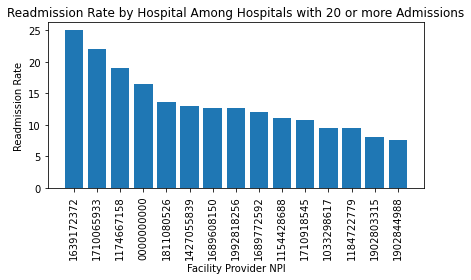

In [34]:
plt.bar('Facility Provider NPI', 'readmission_rate', data=facility_providers2)
plt.xlabel('Facility Provider NPI')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rate by Hospital Among Hospitals with 20 or more Admissions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('readmission_rate_by_hospital.png');

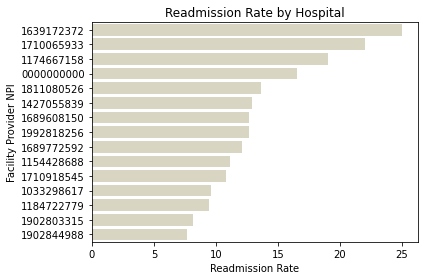

In [35]:
sns.barplot(y='Facility Provider NPI', x='readmission_rate', data=facility_providers2, color='#dbd7bf', orient='h')
plt.xlabel('Readmission Rate')
plt.ylabel('Facility Provider NPI')
plt.title('Readmission Rate by Hospital')
plt.tight_layout()
plt.savefig('readmission_rate_by_hospital_sns.png', transparent=True);

# #3 - readmissions by attending

In [36]:
attending_provider_count = admissions3['Attending Provider NPI'].value_counts()
attending_provider_count

1.366605e+09    54
1.669415e+09    45
1.154347e+09    44
1.891831e+09    42
1.215968e+09    41
                ..
1.043218e+09     1
1.013013e+09     1
1.740389e+09     1
1.588629e+09     1
1.124300e+09     1
Name: Attending Provider NPI, Length: 1931, dtype: int64

In [37]:
attending_provider_readmissions = admissions3.groupby('Attending Provider NPI', as_index=False)['readmission'].sum()
attending_provider_readmissions

,Attending Provider NPI,readmission
0,1.520000e+02,0.0
1,1.980000e+02,0.0
2,1.134363e+08,0.0
3,1.689064e+08,0.0
4,1.003012e+09,0.0
...,...,...
1926,1.992932e+09,1.0
1927,1.992941e+09,1.0
1928,1.992970e+09,0.0
1929,1.992973e+09,0.0


In [38]:
attending_provider_count = pd.DataFrame(attending_provider_count)
attending_provider_count.reset_index(inplace=True)

In [39]:
attending_provider_count.rename(columns={'index': 'Attending Provider NPI', 'Attending Provider NPI': 'admissions'}, inplace=True)
attending_provider_count

,Attending Provider NPI,admissions
0,1.366605e+09,54
1,1.669415e+09,45
2,1.154347e+09,44
3,1.891831e+09,42
4,1.215968e+09,41
...,...,...
1926,1.043218e+09,1
1927,1.013013e+09,1
1928,1.740389e+09,1
1929,1.588629e+09,1


In [40]:
attending_providers = attending_provider_count.merge(attending_provider_readmissions, on='Attending Provider NPI', how='left')
attending_providers

,Attending Provider NPI,admissions,readmission
0,1.366605e+09,54,0.0
1,1.669415e+09,45,0.0
2,1.154347e+09,44,0.0
3,1.891831e+09,42,6.0
4,1.215968e+09,41,1.0
...,...,...,...
1926,1.043218e+09,1,1.0
1927,1.013013e+09,1,1.0
1928,1.740389e+09,1,0.0
1929,1.588629e+09,1,0.0


In [41]:
attending_providers['readmission_rate'] = 100*attending_providers['readmission'] / attending_providers['admissions']
attending_providers.sort_values('readmission_rate', inplace=True, ascending=False)
attending_providers

,Attending Provider NPI,admissions,readmission,readmission_rate
1139,1.811262e+09,1,1.0,100.0
1265,1.427074e+09,1,1.0,100.0
1249,1.134411e+09,1,1.0,100.0
1016,1.063486e+09,1,1.0,100.0
1014,1.679869e+09,1,1.0,100.0
...,...,...,...,...
831,1.972861e+09,2,0.0,0.0
830,1.053440e+09,2,0.0,0.0
828,1.740474e+09,2,0.0,0.0
827,1.992905e+09,2,0.0,0.0


In [42]:
attending_providers2 = attending_providers[attending_providers['admissions'] >= 20]
attending_providers2

,Attending Provider NPI,admissions,readmission,readmission_rate
6,1.417062e+09,39,11.0,28.205128
13,1.679542e+09,34,8.0,23.529412
35,1.386679e+09,25,5.0,20.000000
21,1.720043e+09,31,6.0,19.354839
9,1.932308e+09,37,6.0,16.216216
38,1.053358e+09,25,4.0,16.000000
28,1.669553e+09,27,4.0,14.814815
3,1.891831e+09,42,6.0,14.285714
41,1.073567e+09,22,3.0,13.636364
37,1.316989e+09,25,3.0,12.000000


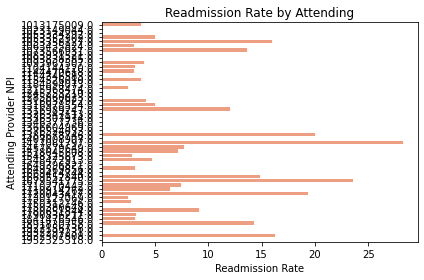

In [43]:
sns.barplot(y='Attending Provider NPI', x='readmission_rate', data=attending_providers2, color='#ff9671', orient='h')
plt.xlabel('Readmission Rate')
plt.ylabel('Attending Provider NPI')
plt.title('Readmission Rate by Attending')
plt.tight_layout()
plt.savefig('readmission_rate_by_attending_sns.png');

# #6 - patients to focus on by readmissions

In [44]:
patient_count = admissions3['Patient ID'].value_counts()
patient_count

DS1|3812     17
DS1|26751    15
DS1|53241    13
DS1|10451    12
DS1|12422    11
             ..
DS1|20740     1
DS1|28995     1
DS1|35964     1
DS1|17393     1
DS1|59072     1
Name: Patient ID, Length: 4701, dtype: int64

In [45]:
patient_readmissions = admissions3.groupby('Patient ID')['readmission'].sum()
patient_readmissions

Patient ID
DS1|10       0.0
DS1|10033    0.0
DS1|10043    0.0
DS1|10073    0.0
DS1|10101    0.0
            ... 
DS1|9978     0.0
DS1|9979     0.0
DS1|9981     0.0
DS1|9994     1.0
DS1|9996     0.0
Name: readmission, Length: 4701, dtype: float64

In [46]:
patient_count = pd.DataFrame(patient_count)
patient_readmissions = patient_readmissions.to_frame()

In [47]:
patient_count.reset_index(inplace=True)
patient_count.rename(columns={'index': 'Patient ID', 'Patient ID': 'admissions'}, inplace=True)
patient_count

,Patient ID,admissions
0,DS1|3812,17
1,DS1|26751,15
2,DS1|53241,13
3,DS1|10451,12
4,DS1|12422,11
...,...,...
4696,DS1|20740,1
4697,DS1|28995,1
4698,DS1|35964,1
4699,DS1|17393,1


In [48]:
patient_readmissions.reset_index(inplace=True)
patient_readmissions.rename(columns={'readmission': 'readmissions'}, inplace=True)
patient_readmissions

,Patient ID,readmissions
0,DS1|10,0.0
1,DS1|10033,0.0
2,DS1|10043,0.0
3,DS1|10073,0.0
4,DS1|10101,0.0
...,...,...
4696,DS1|9978,0.0
4697,DS1|9979,0.0
4698,DS1|9981,0.0
4699,DS1|9994,1.0


In [49]:
patients = patient_count.merge(patient_readmissions, on='Patient ID', how='left')
patients

,Patient ID,admissions,readmissions
0,DS1|3812,17,8.0
1,DS1|26751,15,5.0
2,DS1|53241,13,9.0
3,DS1|10451,12,7.0
4,DS1|12422,11,10.0
...,...,...,...
4696,DS1|20740,1,0.0
4697,DS1|28995,1,0.0
4698,DS1|35964,1,0.0
4699,DS1|17393,1,0.0


In [50]:
patients['readmission_rate'] = patients['readmissions'] / patients['admissions']
patients.sort_values('readmissions', inplace=True, ascending=False)
patients.head(30)

,Patient ID,admissions,readmissions,readmission_rate
4,DS1|12422,11,10.0,0.909091
5,DS1|21926,11,10.0,0.909091
2,DS1|53241,13,9.0,0.692308
0,DS1|3812,17,8.0,0.470588
15,DS1|13593,9,8.0,0.888889
9,DS1|36688,9,7.0,0.777778
19,DS1|3663,8,7.0,0.875000
14,DS1|37477,9,7.0,0.777778
13,DS1|55609,9,7.0,0.777778
8,DS1|48347,9,7.0,0.777778


# #2

In [51]:
primary

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.487857e+09,1.043427e+09,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1.528031e+09,1.902803e+09,1.528031e+09,1.043427e+09,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.477579e+09,1.043427e+09,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1.821178e+09,1.104842e+09,1.821178e+09,1.407059e+09,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.609004e+09,1.184723e+09,2016-09-04,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231368,COV|PCSL|DS1|9999|P|91236|1184722779|1,DS1|9999,DS1|NPI|1851738108,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1.851738e+09,1.184723e+09,2015-02-10,0,1,0,0,NaN
231369,COV|PCSL|DS1|99|P|1263621|1043427248|1,DS1|99,DS1|NPI|1215163035,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.215163e+09,1.043427e+09,2011-08-02,0,1,0,0,NaN
231370,COV|PCSL|DS1|99|P|22491|1043427248|1,DS1|99,DS1|NPI|1215163035,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1.215163e+09,1.043427e+09,2011-04-13,1,1,0,0,99385.0
231371,COV|PCSL|DS1|9|P|341904|1962790014|1,DS1|9,DS1|NPI|1144252396,NaN,DS1|NPI|1962790014,NaN,DS1|1,DS1|5047X,NaN,NaN,1.144252e+09,1.962790e+09,2014-04-07,0,1,0,0,NaN


In [52]:
primary['Encounter Date'] = pd.to_datetime(primary['Encounter Date'])

In [53]:
primary['Encounter Date'].max()

Timestamp('2019-09-22 00:00:00')

In [54]:
# filter primary and admissions to prepare to concatenate
primary2 = primary[['Encounter ID', 'Patient ID', 'Provider Group Provider ID', 'Facility Provider ID', 'Encounter Date']]
primary2.rename(columns={'Encounter Date': 'Encounter End Date'}, inplace=True)
# identify all primary care visits as type 1
primary2['type'] = 1
admissions4 = admissions[['Encounter ID', 'Patient ID', 'Facility Provider ID', 'Encounter End Date']]
# identify all hospital visits as 0
admissions4['type'] = 0
hospital_and_primary = pd.concat([admissions4, primary2], ignore_index=True)

hospital_and_primary

C:\Users\rhilb\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-54-52942fe137d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary2['type'] = 1
<ipython-input-54-52942fe137d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID
0,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|NPI|1710918545,2013-06-16,0,NaN
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|NPI|1306890389,2013-01-14,0,NaN
2,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|NPI|1902803315,2014-01-12,0,NaN
3,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|NPI|1902803315,2012-06-21,0,NaN
4,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|NPI|1427055839,2012-12-09,0,NaN
...,...,...,...,...,...,...
237581,COV|PCSL|DS1|9999|P|91236|1184722779|1,DS1|9999,NaN,2015-02-10,1,DS1|NPI|1184722779
237582,COV|PCSL|DS1|99|P|1263621|1043427248|1,DS1|99,NaN,2011-08-02,1,DS1|NPI|1043427248
237583,COV|PCSL|DS1|99|P|22491|1043427248|1,DS1|99,NaN,2011-04-13,1,DS1|NPI|1043427248
237584,COV|PCSL|DS1|9|P|341904|1962790014|1,DS1|9,NaN,2014-04-07,1,DS1|NPI|1962790014


In [55]:
# sort by patient id and date so that patients are grouped and in order by date
hospital_and_primary.sort_values(["Patient ID", 'Encounter End Date'], inplace=True)
hospital_and_primary

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID
82145,COV|PCSL|DS1|1|P|10130|1083694616|1,DS1|1,NaN,2013-04-11,1,DS1|NPI|1083694616
82146,COV|PCSL|DS1|1|P|371880|1083694616|1,DS1|1,NaN,2013-11-04,1,DS1|NPI|1083694616
82147,COV|PCSL|DS1|1|P|659989|1083694616|1,DS1|1,NaN,2013-11-21,1,DS1|NPI|1083694616
50001,COV|PBSL|DS1|10|P|649805|1144213166|1,DS1|10,NaN,2011-08-17,1,DS1|NPI|1144213166
50002,COV|PBSL|DS1|10|P|702882|1144213166|1,DS1|10,NaN,2011-08-23,1,DS1|NPI|1144213166
...,...,...,...,...,...,...
237576,COV|PCSL|DS1|9999|P|1116342|1043427248|1,DS1|9999,NaN,2011-09-02,1,DS1|NPI|1043427248
237579,COV|PCSL|DS1|9999|P|642185|1043427248|1,DS1|9999,NaN,2012-11-04,1,DS1|NPI|1043427248
237578,COV|PCSL|DS1|9999|P|494636|1184722779|1,DS1|9999,NaN,2014-10-07,1,DS1|NPI|1184722779
237580,COV|PCSL|DS1|9999|P|818335|1184722779|1,DS1|9999,NaN,2014-12-09,1,DS1|NPI|1184722779


In [56]:
# clean patient ids
patient_id2 = hospital_and_primary['Patient ID'].str.split('|', expand=True)
patient_id2

,0,1
82145,DS1,1
82146,DS1,1
82147,DS1,1
50001,DS1,10
50002,DS1,10
...,...,...
237576,DS1,9999
237579,DS1,9999
237578,DS1,9999
237580,DS1,9999


In [57]:
hospital_and_primary['patient_id_clean'] = patient_id2[1]
hospital_and_primary

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID,patient_id_clean
82145,COV|PCSL|DS1|1|P|10130|1083694616|1,DS1|1,NaN,2013-04-11,1,DS1|NPI|1083694616,1
82146,COV|PCSL|DS1|1|P|371880|1083694616|1,DS1|1,NaN,2013-11-04,1,DS1|NPI|1083694616,1
82147,COV|PCSL|DS1|1|P|659989|1083694616|1,DS1|1,NaN,2013-11-21,1,DS1|NPI|1083694616,1
50001,COV|PBSL|DS1|10|P|649805|1144213166|1,DS1|10,NaN,2011-08-17,1,DS1|NPI|1144213166,10
50002,COV|PBSL|DS1|10|P|702882|1144213166|1,DS1|10,NaN,2011-08-23,1,DS1|NPI|1144213166,10
...,...,...,...,...,...,...,...
237576,COV|PCSL|DS1|9999|P|1116342|1043427248|1,DS1|9999,NaN,2011-09-02,1,DS1|NPI|1043427248,9999
237579,COV|PCSL|DS1|9999|P|642185|1043427248|1,DS1|9999,NaN,2012-11-04,1,DS1|NPI|1043427248,9999
237578,COV|PCSL|DS1|9999|P|494636|1184722779|1,DS1|9999,NaN,2014-10-07,1,DS1|NPI|1184722779,9999
237580,COV|PCSL|DS1|9999|P|818335|1184722779|1,DS1|9999,NaN,2014-12-09,1,DS1|NPI|1184722779,9999


In [58]:
hospital_and_primary['patient_id_clean'] = pd.to_numeric(hospital_and_primary['patient_id_clean'])

In [59]:
# calculate difference between subsequent dates
hospital_and_primary['date_diff'] = hospital_and_primary['Encounter End Date'].diff()
# calculate difference between subsequent types 
hospital_and_primary['type_diff'] = hospital_and_primary['type'].diff()
# calculate difference between subsequent patient ids
hospital_and_primary['patient_id_diff'] = hospital_and_primary['patient_id_clean'].diff()

In [60]:
hospital_and_primary

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID,patient_id_clean,date_diff,type_diff,patient_id_diff
82145,COV|PCSL|DS1|1|P|10130|1083694616|1,DS1|1,NaN,2013-04-11,1,DS1|NPI|1083694616,1,NaT,NaN,NaN
82146,COV|PCSL|DS1|1|P|371880|1083694616|1,DS1|1,NaN,2013-11-04,1,DS1|NPI|1083694616,1,207 days,0.0,0.0
82147,COV|PCSL|DS1|1|P|659989|1083694616|1,DS1|1,NaN,2013-11-21,1,DS1|NPI|1083694616,1,17 days,0.0,0.0
50001,COV|PBSL|DS1|10|P|649805|1144213166|1,DS1|10,NaN,2011-08-17,1,DS1|NPI|1144213166,10,-827 days,0.0,9.0
50002,COV|PBSL|DS1|10|P|702882|1144213166|1,DS1|10,NaN,2011-08-23,1,DS1|NPI|1144213166,10,6 days,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
237576,COV|PCSL|DS1|9999|P|1116342|1043427248|1,DS1|9999,NaN,2011-09-02,1,DS1|NPI|1043427248,9999,133 days,0.0,0.0
237579,COV|PCSL|DS1|9999|P|642185|1043427248|1,DS1|9999,NaN,2012-11-04,1,DS1|NPI|1043427248,9999,429 days,0.0,0.0
237578,COV|PCSL|DS1|9999|P|494636|1184722779|1,DS1|9999,NaN,2014-10-07,1,DS1|NPI|1184722779,9999,702 days,0.0,0.0
237580,COV|PCSL|DS1|9999|P|818335|1184722779|1,DS1|9999,NaN,2014-12-09,1,DS1|NPI|1184722779,9999,63 days,0.0,0.0


In [61]:
primary[primary['Patient ID'] == 'DS1|10303']

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
41393,COV|PBSL|DS1|10303|P|1076648|1144213166|1,DS1|10303,DS1|NPI|1366428021,NaN,DS1|NPI|1144213166,NaN,DS1|1,DS1|5047W,NaN,NaN,1.366428e+09,1.144213e+09,2012-05-06,0,1,0,0,NaN
41394,COV|PBSL|DS1|10303|P|10896|1912987553|1,DS1|10303,DS1|NPI|1447235130,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.447235e+09,1.912988e+09,2012-06-30,0,1,0,0,NaN
41395,COV|PBSL|DS1|10303|P|1100606|1912987553|1,DS1|10303,DS1|NPI|1770672859,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.770673e+09,1.912988e+09,2011-12-26,0,1,0,0,NaN
41396,COV|PBSL|DS1|10303|P|1148633|1912987553|1,DS1|10303,DS1|NPI|1235115635,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.235116e+09,1.912988e+09,2012-02-18,0,1,0,0,NaN
41397,COV|PBSL|DS1|10303|P|252871|1316025091|1,DS1|10303,DS1|NPI|1770672859,NaN,DS1|NPI|1316025091,NaN,DS1|1,DS1|5047W,NaN,NaN,1.770673e+09,1.316025e+09,2012-11-19,0,1,0,0,NaN
41398,COV|PBSL|DS1|10303|P|351900|1912987553|1,DS1|10303,DS1|NPI|1427034883,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.427035e+09,1.912988e+09,2011-09-23,1,1,0,0,99395
41399,COV|PBSL|DS1|10303|P|384598|1912987553|1,DS1|10303,DS1|NPI|1700112828,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.700113e+09,1.912988e+09,2012-07-06,1,1,0,0,99391
41400,COV|PBSL|DS1|10303|P|388622|1396785168|1,DS1|10303,DS1|NPI|1225353576,NaN,DS1|NPI|1396785168,NaN,DS1|1,DS1|5047W,NaN,NaN,1.225354e+09,1.396785e+09,2011-04-15,0,1,0,0,NaN
41401,COV|PBSL|DS1|10303|P|48671|1912987553|1,DS1|10303,DS1|NPI|1164407839,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.164408e+09,1.912988e+09,2012-06-28,0,1,0,0,NaN
41402,COV|PBSL|DS1|10303|P|589590|1912987553|1,DS1|10303,DS1|NPI|1164407839,NaN,DS1|NPI|1912987553,NaN,DS1|1,DS1|5047W,NaN,NaN,1.164408e+09,1.912988e+09,2012-05-24,0,1,0,0,NaN


In [62]:
# filter for only patient id = 0 to only include rows for repeated patients
sees_pcp = hospital_and_primary[hospital_and_primary['patient_id_diff'] == 0]
# filter for type diff equals 1 which will only include pcp visits right after hospital visits
sees_pcp = sees_pcp[sees_pcp['type_diff'] == 1]
#filter for date differences less than or equal to 7
sees_pcp = sees_pcp[sees_pcp['date_diff'] <= dt.timedelta(days = 7)]
sees_pcp

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID,patient_id_clean,date_diff,type_diff,patient_id_diff
46604,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,DS1|10043,NaN,2014-01-12,1,DS1|NPI|1043427248,10043,0 days,1.0,0.0
46686,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,DS1|10073,NaN,2012-06-27,1,DS1|NPI|1043427248,10073,6 days,1.0,0.0
52861,COV|PCSL|DS1|10101|P|1189971|1043427248|1,DS1|10101,NaN,2012-12-12,1,DS1|NPI|1043427248,10101,3 days,1.0,0.0
47619,COV|PBSL|DS1|10303|P|924098|1912987553|1,DS1|10303,NaN,2012-06-25,1,DS1|NPI|1912987553,10303,1 days,1.0,0.0
47628,COV|PBSL|DS1|10305|P|823298|1184722779|1,DS1|10305,NaN,2014-05-13,1,DS1|NPI|1184722779,10305,1 days,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
237404,COV|PCSL|DS1|9943|P|1315984|1184722779|1,DS1|9943,NaN,2014-11-03,1,DS1|NPI|1184722779,9943,4 days,1.0,0.0
237417,COV|PCSL|DS1|9945|P|840374|1043427248|1,DS1|9945,NaN,2013-02-14,1,DS1|NPI|1043427248,9945,3 days,1.0,0.0
237516,COV|PCSL|DS1|9978|P|696226|1043427248|1,DS1|9978,NaN,2015-09-11,1,DS1|NPI|1043427248,9978,6 days,1.0,0.0
237520,COV|PCSL|DS1|9979|P|281365|1477666352|1,DS1|9979,NaN,2015-02-15,1,DS1|NPI|1477666352,9979,4 days,1.0,0.0


In [63]:
sees_pcp.head(20)

,Encounter ID,Patient ID,Facility Provider ID,Encounter End Date,type,Provider Group Provider ID,patient_id_clean,date_diff,type_diff,patient_id_diff
46604,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,DS1|10043,NaN,2014-01-12,1,DS1|NPI|1043427248,10043,0 days,1.0,0.0
46686,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,DS1|10073,NaN,2012-06-27,1,DS1|NPI|1043427248,10073,6 days,1.0,0.0
52861,COV|PCSL|DS1|10101|P|1189971|1043427248|1,DS1|10101,NaN,2012-12-12,1,DS1|NPI|1043427248,10101,3 days,1.0,0.0
47619,COV|PBSL|DS1|10303|P|924098|1912987553|1,DS1|10303,NaN,2012-06-25,1,DS1|NPI|1912987553,10303,1 days,1.0,0.0
47628,COV|PBSL|DS1|10305|P|823298|1184722779|1,DS1|10305,NaN,2014-05-13,1,DS1|NPI|1184722779,10305,1 days,1.0,0.0
47678,COV|PBSL|DS1|10325|P|490171|1184722779|1,DS1|10325,NaN,2012-07-08,1,DS1|NPI|1184722779,10325,1 days,1.0,0.0
47753,COV|PBSL|DS1|10343|P|101118|1043427248|1,DS1|10343,NaN,2010-03-08,1,DS1|NPI|1043427248,10343,5 days,1.0,0.0
47967,COV|PBSL|DS1|10411|P|927724|1043427248|1,DS1|10411,NaN,2015-02-27,1,DS1|NPI|1043427248,10411,1 days,1.0,0.0
47975,COV|PBSL|DS1|10415|P|1111104|1912987553|1,DS1|10415,NaN,2012-08-22,1,DS1|NPI|1912987553,10415,2 days,1.0,0.0
48013,COV|PBSL|DS1|10423|P|524015|1043427248|1,DS1|10423,NaN,2014-12-29,1,DS1|NPI|1043427248,10423,2 days,1.0,0.0


In [64]:
# calculate rate of seeing pcp within 7 days of hospital visit
len(sees_pcp) / len(admissions)

0.2974408498309995

In [65]:
len(admissions)

6213

In [66]:
sees_pcp['date_diff'].min()

Timedelta('0 days 00:00:00')

In [67]:
sees_pcp['sees_pcp'] = 1

In [68]:
sees_pcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 46604 to 237524
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Encounter ID                1848 non-null   object         
 1   Patient ID                  1848 non-null   object         
 2   Facility Provider ID        242 non-null    object         
 3   Encounter End Date          1848 non-null   datetime64[ns] 
 4   type                        1848 non-null   int64          
 5   Provider Group Provider ID  1821 non-null   object         
 6   patient_id_clean            1848 non-null   int64          
 7   date_diff                   1848 non-null   timedelta64[ns]
 8   type_diff                   1848 non-null   float64        
 9   patient_id_diff             1848 non-null   float64        
 10  sees_pcp                    1848 non-null   int64          
dtypes: datetime64[ns](1), float64(2), int

# #2 Joshua's way

In [69]:
admissions['patient_adm_ct'] = admissions.groupby('Patient ID')['Encounter Start Date'].transform('rank', method = 'first')

In [70]:
#reduce pcp to relevant columns
pcp2 = primary[['Encounter ID','Patient ID','Service Provider NPI','Provider Group NPI','Encounter Date']]                                                                     

#merger readmissions with pcp2
readm_pcp = pd.merge(admissions, pcp2, how = 'left', on = 'Patient ID', suffixes = ('', ' pcp'))

#create timedelta column between hospital release and PCP visit (will have negatives)
readm_pcp['Hospital to PCP Days'] = readm_pcp['Encounter Date'] - readm_pcp['Encounter End Date']

#cut out all rows with negative time in Hospital to PCP Days, but keep na rows (people who never saw PCP)
readm_pcp = readm_pcp[(readm_pcp['Hospital to PCP Days'] >= dt.timedelta(days = 0)) | (readm_pcp['Hospital to PCP Days'].isnull())]

#Keep people who never saw PCP and rows where Hospital to PCP Days is minimized by Patient ID and patient_adm_ct
readm_pcp = readm_pcp[readm_pcp['Hospital to PCP Days'].isnull() 
                      | 
                      (readm_pcp['Hospital to PCP Days'] == readm_pcp.groupby(['Patient ID', 'patient_adm_ct'])['Hospital to PCP Days'].transform('min'))]

#create boolean column for PCP visits within 7 days
readm_pcp['PCP Under 7 Days'] = readm_pcp['Hospital to PCP Days'] <= dt.timedelta(days = 7)

#take a peak
readm_pcp

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,patient_adm_ct,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
20,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,-152 days,-153 days,2 days,-155 days,10033,10023.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10033|P|711310|1043427248|1,1.619980e+09,1.043427e+09,2014-02-16,398 days,False
27,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days,10043,10.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1.619200e+09,1.043427e+09,2014-01-12,0 days,True
38,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days,10073,30.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,1.659394e+09,1.043427e+09,2012-06-27,6 days,True
60,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days,10101,28.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10101|P|1189971|1043427248|1,1.952538e+09,1.043427e+09,2012-12-12,3 days,True
71,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.518046e+09,1992818256,2015-03-11,2015-03-14,0,0,2.0,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0,825 days,825 days,3 days,822 days,10118,17.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10118|P|486026|1043427248|1,1.316362e+09,1.043427e+09,2015-11-04,235 days,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44071,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,-207 days,-206 days,5 days,-211 days,9979,1.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|9979|P|281365|1477666352|1,1.740278e+09,1.477666e+09,2015-02-15,4 days,True
44074,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,-183 days,-185 days,3 days,-188 days,9981,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|9981|P|1094367|1043427248|1,1.992932e+

In [71]:
readm_pcp_under7 = readm_pcp[readm_pcp['PCP Under 7 Days']]
readm_pcp_under7

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_clean,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,patient_adm_ct,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
27,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,358 days,363 days,7 days,356 days,10043,10.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1.619200e+09,1.043427e+09,2014-01-12,0 days,True
38,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,-571 days,-570 days,8 days,-578 days,10073,30.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,1.659394e+09,1.043427e+09,2012-06-27,6 days,True
60,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,176 days,171 days,3 days,168 days,10101,28.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10101|P|1189971|1043427248|1,1.952538e+09,1.043427e+09,2012-12-12,3 days,True
253,HIA|DS1|10303|DS1|NPI|1710918545|1,DS1|10303,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1508841602,1.508842e+09,1710918545,2012-06-21,2012-06-24,0,0,2.0,9,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,15374.00,250.0,-601 days,-599 days,3 days,-602 days,10303,7.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10303|P|924098|1912987553|1,1.447235e+09,1.912988e+09,2012-06-25,1 days,True
257,HIA|DS1|10305|DS1|NPI|1184722779|1,DS1|10305,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1730127069,1.730127e+09,1184722779,2014-05-10,2014-05-12,0,0,2.0,1,1,21.0,654.21,"Previous cesarean delivery, delivered, with or...",NaN,NaN,0,7650.00,250.0,688 days,687 days,2 days,685 days,10305,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10305|P|823298|1184722779|1,1.417113e+09,1.184723e+09,2014-05-13,1 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44039,HIA|DS1|9943|DS1|NPI|1184722779|3,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1265649966,1.265650e+09,1184722779,2014-10-28,2014-10-30,0,0,3.0,1,1,21.0,NaN,NaN,K43.0,"Incisional hernia with obstruction, without ga...",0,20869.25,500.0,368 days,367 days,2 days,365 days,9943,0.0,2012-09-01,2012-10-01,30 days,0 days,3.0,COV|PCSL|DS1|9943|P|1315984|1184722779|1,1.659330e+09,1.184723e+09,2014-11-03,4 days,True
44051,HIA|DS1|9945|DS1|NPI|1902803315|1,DS1|9945,DS1|1,DS1|5047W,DS1|NPI|1902803315,DS1|NPI|1104144120,1.104144e+09,1902803315,2013-02-09,2013-02-11,0,1,3.0,1,1,21.0,NaN,NaN,O48.0,Post-term pregnancy,0,9350.00,250.0,-626 days,-626 days,2 days,-628 days,9945,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|9945|P|840374|1043427248|1,1.164698e+09,1.043427e+09,2013-02-14,3 days,True

In [72]:
readm_pcp_u7d = readm_pcp[readm_pcp['PCP Under 7 Days']]

In [73]:
# merge to new ream_pcp dataframe, fill NAs with False
readm_pcp_new = pd.merge(admissions3, readm_pcp, how = 'left')
readm_pcp_new['PCP Under 7 Days'] = readm_pcp_new['PCP Under 7 Days'].fillna(False)

In [74]:
readm_pcp_new

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,patient_id_clean,readmission,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,patient_adm_ct,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
0,HIA|DS1|10|DS1|NPI|1710918545|1,DS1|10,DS1|1,DS1|5047W,DS1|NPI|1710918545,DS1|NPI|1962461012,1.962461e+09,1710918545,2013-06-13,2013-06-16,1,0,1.0,1,1,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0,29219.00,250.0,10,0.0,NaT,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,False
1,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,0,0,1.0,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0,10033,0.0,-152 days,-153 days,2 days,-155 days,10023.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10033|P|711310|1043427248|1,1.619980e+09,1.043427e+09,2014-02-16,398 days,False
2,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,0,0,3.0,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0,10043,0.0,358 days,363 days,7 days,356 days,10.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10043|P|538933|1043427248|1|SHIFTED,1.619200e+09,1.043427e+09,2014-01-12,0 days,True
3,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,1,0,1.0,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0,10073,0.0,-571 days,-570 days,8 days,-578 days,30.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PBSL|DS1|10073|P|301709|1043427248|1|SHIFTED,1.659394e+09,1.043427e+09,2012-06-27,6 days,True
4,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,0,0,3.0,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0,10101,0.0,176 days,171 days,3 days,168 days,28.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|10101|P|1189971|1043427248|1,1.952538e+09,1.043427e+09,2012-12-12,3 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|9979,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1720043417,1.720043e+09,1689772592,2015-02-06,2015-02-11,0,0,2.0,2,6,21.0,NaN,NaN,O44.13,"Complete placenta previa with hemorrhage, thir...",0,23598.00,250.0,9979,0.0,-207 days,-206 days,5 days,-211 days,1.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|9979|P|281365|1477666352|1,1.740278e+09,1.477666e+09,2015-02-15,4 days,True
6210,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|9981,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1215968474,1.215968e+09,1427055839,2014-08-07,2014-08-10,0,1,3.0,1,1,21.0,664.11,"Second-degree perineal laceration, delivered, ...",NaN,NaN,0,14800.00,250.0,9981,0.0,-183 days,-185 days,3 days,-188 days,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|9981|P|1094367|1043427248|1,1.992932e+09,1.043427e+09,2014-08-11,1 days,True
6211,HIA|DS1|9994|DS1|NPI|1689608150|

In [75]:
#Note this weird extra row that's been created with the merge back.
#The difference between these two rows: Had two different follow-ups within same day.
#Should only count as one hospital Encounter admission and only as one PCP follow-up
readm_pcp_new[readm_pcp_new.duplicated(subset='Encounter ID', keep=False)]

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,patient_id_clean,readmission,start_date_diff,end_date_diff,length_of_stay,length_between,patient_id_diff,ex_date1,ex_date2,thirty_days,zero_days,patient_adm_ct,Encounter ID pcp,Service Provider NPI,Provider Group NPI,Encounter Date,Hospital to PCP Days,PCP Under 7 Days
4452,HIA|DS1|49588|DS1|NPI|1689772592|1,DS1|49588,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1790733863,1.790734e+09,1689772592,2012-07-26,2012-07-28,1,0,1.0,1,1,21.0,250.13,"Diabetes with ketoacidosis, type I [juvenile t...",NaN,NaN,0,18928.0,250.0,49588,0.0,208 days,209 days,2 days,207 days,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|49588|P|1191120|1164512851|1,1.194010e+09,1.164513e+09,2012-07-31,3 days,True
4453,HIA|DS1|49588|DS1|NPI|1689772592|1,DS1|49588,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1790733863,1.790734e+09,1689772592,2012-07-26,2012-07-28,1,0,1.0,1,1,21.0,250.13,"Diabetes with ketoacidosis, type I [juvenile t...",NaN,NaN,0,18928.0,250.0,49588,0.0,208 days,209 days,2 days,207 days,2.0,2012-09-01,2012-10-01,30 days,0 days,1.0,COV|PCSL|DS1|49588|P|540038|1760552343|1,1.972571e+09,1.760552e+09,2012-07-31,3 days,True


In [76]:
print(round(100*(sum(readm_pcp_new['PCP Under 7 Days'])-readm_pcp_new.duplicated(subset = 'Encounter ID').sum())/len(readm_pcp_new['Encounter ID'].unique()),2), '% of admissions see PCP within 7 days of hospital release.')

30.0 % of admissions see PCP within 7 days of hospital release.


In [77]:
sum(readm_pcp_new['PCP Under 7 Days'])-readm_pcp_new.duplicated(subset = 'Encounter ID').sum()

1864

# #3 - PCP visits under 7 days by PCP group

In [78]:
provider_group_count = readm_pcp_new['Provider Group NPI'].value_counts()
provider_group_count

1.043427e+09    2209
1.184723e+09    1164
1.164513e+09     481
1.407059e+09     247
1.316025e+09     173
                ... 
1.881810e+09       1
1.922014e+09       1
1.184783e+09       1
1.417026e+09       1
1.316903e+09       1
Name: Provider Group NPI, Length: 118, dtype: int64

In [79]:
provider_group_seespcp = readm_pcp_new.groupby('Provider Group NPI')['PCP Under 7 Days'].sum()
provider_group_seespcp

Provider Group NPI
0.000000e+00     0
1.003864e+09     0
1.003897e+09     0
1.003914e+09     1
1.003993e+09     2
                ..
1.962483e+09    12
1.962496e+09     1
1.962790e+09     0
1.972597e+09     1
1.992931e+09     5
Name: PCP Under 7 Days, Length: 118, dtype: int64

In [80]:
provider_group_count = pd.DataFrame(provider_group_count)
provider_group_seespcp = provider_group_seespcp.to_frame()

In [81]:
provider_group_count.reset_index(inplace=True)
provider_group_count.rename(columns={'index': 'Provider Group NPI', 'Provider Group NPI': 'admissions'}, inplace=True)
provider_group_count

,Provider Group NPI,admissions
0,1.043427e+09,2209
1,1.184723e+09,1164
2,1.164513e+09,481
3,1.407059e+09,247
4,1.316025e+09,173
...,...,...
113,1.881810e+09,1
114,1.922014e+09,1
115,1.184783e+09,1
116,1.417026e+09,1


In [82]:
provider_group_seespcp.reset_index(inplace=True)
provider_group_seespcp.rename(columns={0: 'Provider Group NPI', 1: 'PCP Under 7 Days'}, inplace=True)
provider_group_seespcp

,Provider Group NPI,PCP Under 7 Days
0,0.000000e+00,0
1,1.003864e+09,0
2,1.003897e+09,0
3,1.003914e+09,1
4,1.003993e+09,2
...,...,...
113,1.962483e+09,12
114,1.962496e+09,1
115,1.962790e+09,0
116,1.972597e+09,1


In [83]:
provider_groups = provider_group_count.merge(provider_group_seespcp, on='Provider Group NPI', how='left')
provider_groups

,Provider Group NPI,admissions,PCP Under 7 Days
0,1.043427e+09,2209,842
1,1.184723e+09,1164,429
2,1.164513e+09,481,212
3,1.407059e+09,247,77
4,1.316025e+09,173,48
...,...,...,...
113,1.881810e+09,1,0
114,1.922014e+09,1,1
115,1.184783e+09,1,0
116,1.417026e+09,1,0


In [84]:
provider_groups['pcp_rate'] = 100*provider_groups['PCP Under 7 Days'] / provider_groups['admissions']
provider_groups.sort_values('pcp_rate', inplace=True, ascending=False)
provider_groups

,Provider Group NPI,admissions,PCP Under 7 Days,pcp_rate
117,1.316903e+09,1,1,100.0
96,1.770676e+09,1,1,100.0
93,1.922125e+09,1,1,100.0
60,1.093168e+09,2,2,100.0
89,1.396912e+09,1,1,100.0
...,...,...,...,...
31,1.801809e+09,4,0,0.0
84,1.093107e+09,1,0,0.0
85,1.235108e+09,1,0,0.0
30,1.477624e+09,4,0,0.0


In [85]:
provider_groups2 = provider_groups[provider_groups['admissions'] >=10]
provider_groups2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 16 to 17
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Provider Group NPI  18 non-null     float64
 1   admissions          18 non-null     int64  
 2   PCP Under 7 Days    18 non-null     int64  
 3   pcp_rate            18 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 720.0 bytes


In [86]:
provider_groups2['Provider Group NPI'] = provider_groups2['Provider Group NPI'].astype(int)
provider_groups2['Provider Group NPI'] = provider_groups2['Provider Group NPI'].astype(str)
provider_groups2

<ipython-input-86-2e9d4a75b7a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provider_groups2['Provider Group NPI'] = provider_groups2['Provider Group NPI'].astype(int)
<ipython-input-86-2e9d4a75b7a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provider_groups2['Provider Group NPI'] = provider_groups2['Provider Group NPI'].astype(str)


,Provider Group NPI,admissions,PCP Under 7 Days,pcp_rate
16,1245579655,11,10,90.909091
11,1235187311,19,13,68.421053
13,1386637346,15,9,60.000000
2,1164512851,481,212,44.074844
10,1518947167,19,8,42.105263
8,1205884392,31,13,41.935484
12,1083694616,17,7,41.176471
5,1912987553,108,44,40.740741
9,1144213166,25,10,40.000000
0,1043427248,2209,842,38.116795


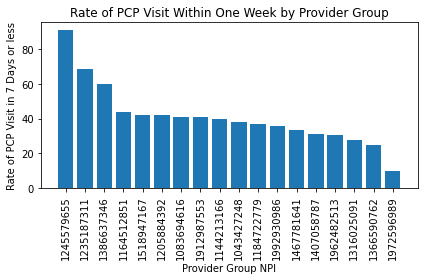

In [87]:
plt.bar('Provider Group NPI', 'pcp_rate', data=provider_groups2)
plt.xlabel('Provider Group NPI')
plt.ylabel('Rate of PCP Visit in 7 Days or less')
plt.title('Rate of PCP Visit Within One Week by Provider Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('seespcp_rate_by_hospital.png');

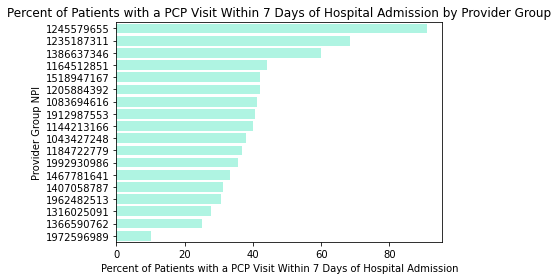

In [88]:
sns.barplot(y='Provider Group NPI', x='pcp_rate', data=provider_groups2, color='#a4ffe7', orient='h')
plt.xlabel('Percent of Patients with a PCP Visit Within 7 Days of Hospital Admission')
plt.ylabel('Provider Group NPI')
plt.title('Percent of Patients with a PCP Visit Within 7 Days of Hospital Admission by Provider Group')
plt.tight_layout()
plt.savefig('seespcp_rate_by_provider_group_sns.png', transparent=True);

# #3 PCP Visits under 7 days by service provider

In [107]:
service_provider_count = readm_pcp_new['Service Provider NPI'].value_counts()
service_provider_count
service_provider_seespcp = readm_pcp_new.groupby('Service Provider NPI')['PCP Under 7 Days'].sum()
service_provider_seespcp

Service Provider NPI
1.003046e+09     1
1.003102e+09    14
1.003351e+09     0
1.003826e+09     0
1.003838e+09     0
                ..
1.992787e+09     0
1.992885e+09     1
1.992932e+09    30
1.992951e+09     0
1.992973e+09     0
Name: PCP Under 7 Days, Length: 979, dtype: int64

In [108]:
service_provider_count = pd.DataFrame(service_provider_count)
service_provider_seespcp = service_provider_seespcp.to_frame()

In [109]:
service_provider_count.reset_index(inplace=True)
service_provider_count.rename(columns={'index': 'Service Provider NPI', 'Service Provider NPI': 'admissions'}, inplace=True)
service_provider_count

,Service Provider NPI,admissions
0,1.104884e+09,66
1,1.619980e+09,52
2,1.467644e+09,50
3,1.972705e+09,50
4,1.437181e+09,49
...,...,...
974,1.528023e+09,1
975,1.437229e+09,1
976,1.083841e+09,1
977,1.598060e+09,1


In [110]:
service_provider_seespcp.reset_index(inplace=True)
service_provider_seespcp.rename(columns={0: 'Service Provider NPI', 1: 'PCP Under 7 Days'}, inplace=True)
service_provider_seespcp

,Service Provider NPI,PCP Under 7 Days
0,1.003046e+09,1
1,1.003102e+09,14
2,1.003351e+09,0
3,1.003826e+09,0
4,1.003838e+09,0
...,...,...
974,1.992787e+09,0
975,1.992885e+09,1
976,1.992932e+09,30
977,1.992951e+09,0


In [111]:
service_providers = service_provider_count.merge(service_provider_seespcp, on='Service Provider NPI', how='left')
service_providers

,Service Provider NPI,admissions,PCP Under 7 Days
0,1.104884e+09,66,41
1,1.619980e+09,52,18
2,1.467644e+09,50,28
3,1.972705e+09,50,12
4,1.437181e+09,49,28
...,...,...,...
974,1.528023e+09,1,0
975,1.437229e+09,1,0
976,1.083841e+09,1,0
977,1.598060e+09,1,0


In [112]:
service_providers['pcp_rate'] = 100*service_providers['PCP Under 7 Days'] / service_providers['admissions']
service_providers.sort_values('pcp_rate', inplace=True, ascending=False)
service_providers

,Service Provider NPI,admissions,PCP Under 7 Days,pcp_rate
489,1.356399e+09,2,2,100.0
658,1.619033e+09,1,1,100.0
672,1.144415e+09,1,1,100.0
671,1.780866e+09,1,1,100.0
670,1.083767e+09,1,1,100.0
...,...,...,...,...
613,1.578594e+09,2,0,0.0
236,1.174565e+09,6,0,0.0
238,1.457372e+09,6,0,0.0
607,1.508236e+09,2,0,0.0


In [113]:
service_providers['Service Provider NPI'] = service_providers['Service Provider NPI'].astype(int)
service_providers

,Service Provider NPI,admissions,PCP Under 7 Days,pcp_rate
489,1356399380,2,2,100.0
658,1619033057,1,1,100.0
672,1144414798,1,1,100.0
671,1780866038,1,1,100.0
670,1083766752,1,1,100.0
...,...,...,...,...
613,1578593521,2,0,0.0
236,1174565451,6,0,0.0
238,1457371585,6,0,0.0
607,1508236100,2,0,0.0


In [118]:
service_providers2 = service_providers[service_providers['admissions'] >= 10]
service_providers2

,Service Provider NPI,admissions,PCP Under 7 Days,pcp_rate
105,1619017670,12,11,91.666667
121,1740560044,10,9,90.000000
53,1225292055,17,15,88.235294
15,1992932388,35,30,85.714286
86,1396713426,13,11,84.615385
...,...,...,...,...
117,1558396135,10,0,0.000000
118,1144254590,10,0,0.000000
102,1205064326,12,0,0.000000
127,1619377447,10,0,0.000000


# #6 patients to focus on revisited

In [89]:
patient_seespcp = readm_pcp_new.groupby('Patient ID')['PCP Under 7 Days'].sum()
patient_seespcp

Patient ID
DS1|10       0
DS1|10033    0
DS1|10043    1
DS1|10073    1
DS1|10101    1
            ..
DS1|9978     1
DS1|9979     1
DS1|9981     1
DS1|9994     0
DS1|9996     0
Name: PCP Under 7 Days, Length: 4701, dtype: int64

In [90]:
patient_seespcp = patient_seespcp.to_frame()
patient_seespcp

,PCP Under 7 Days
Patient ID,
DS1|10,0
DS1|10033,0
DS1|10043,1
DS1|10073,1
DS1|10101,1
...,...
DS1|9978,1
DS1|9979,1
DS1|9981,1


In [91]:
patient_seespcp.reset_index(inplace=True)
patient_seespcp

,Patient ID,PCP Under 7 Days
0,DS1|10,0
1,DS1|10033,0
2,DS1|10043,1
3,DS1|10073,1
4,DS1|10101,1
...,...,...
4696,DS1|9978,1
4697,DS1|9979,1
4698,DS1|9981,1
4699,DS1|9994,0


In [92]:
patients

,Patient ID,admissions,readmissions,readmission_rate
4,DS1|12422,11,10.0,0.909091
5,DS1|21926,11,10.0,0.909091
2,DS1|53241,13,9.0,0.692308
0,DS1|3812,17,8.0,0.470588
15,DS1|13593,9,8.0,0.888889
...,...,...,...,...
1865,DS1|48458,1,0.0,0.000000
1866,DS1|57764,1,0.0,0.000000
1867,DS1|33013,1,0.0,0.000000
1868,DS1|47763,1,0.0,0.000000


In [93]:
patients2 = patients.merge(patient_seespcp, on='Patient ID', how='left')
patients2

,Patient ID,admissions,readmissions,readmission_rate,PCP Under 7 Days
0,DS1|12422,11,10.0,0.909091,1
1,DS1|21926,11,10.0,0.909091,0
2,DS1|53241,13,9.0,0.692308,3
3,DS1|3812,17,8.0,0.470588,8
4,DS1|13593,9,8.0,0.888889,1
...,...,...,...,...,...
4696,DS1|48458,1,0.0,0.000000,0
4697,DS1|57764,1,0.0,0.000000,1
4698,DS1|33013,1,0.0,0.000000,0
4699,DS1|47763,1,0.0,0.000000,0


In [94]:
patients2['pcp_rate'] = patients2['PCP Under 7 Days'] / patients2['admissions']
patients2

,Patient ID,admissions,readmissions,readmission_rate,PCP Under 7 Days,pcp_rate
0,DS1|12422,11,10.0,0.909091,1,0.090909
1,DS1|21926,11,10.0,0.909091,0,0.000000
2,DS1|53241,13,9.0,0.692308,3,0.230769
3,DS1|3812,17,8.0,0.470588,8,0.470588
4,DS1|13593,9,8.0,0.888889,1,0.111111
...,...,...,...,...,...,...
4696,DS1|48458,1,0.0,0.000000,0,0.000000
4697,DS1|57764,1,0.0,0.000000,1,1.000000
4698,DS1|33013,1,0.0,0.000000,0,0.000000
4699,DS1|47763,1,0.0,0.000000,0,0.000000


In [95]:
patients2[['readmission_rate', 'pcp_rate']].corr()

,readmission_rate,pcp_rate
readmission_rate,1.000000,-0.040448
pcp_rate,-0.040448,1.000000


# #5

In [96]:
members

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,NaN,1.457336e+09,"NELSEN, KAY M.",1.144213e+09,REGENTS OF THE UNIV OF CA,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,NaN,1.477565e+09,"KAMINKER, SHARON .",1.043427e+09,UCLA MEDICAL GROUP,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-04-18 00:00:00+00,2015-05-18 00:00:00+00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00,2010-04-09 00:00:00+00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00,2012-10-02 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61514,DS1|9995,DS1|5047W,DS1|1,1,47,1963-07-26,92104.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-01-01 00:00:00+00,2011-01-15 00:00:00+00
61515,DS1|9996,DS1|5047X,DS1|1,1,26,1983-04-17,94122.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-03-28 00:00:00+00,2010-04-17 00:00:00+00
61516,DS1|9997,DS1|5047W,DS1|1,1,4,2008-12-11,92840.

In [97]:
members_nopcp_visits = members[members['Count Primary Care Visits in Last 36 Months'] == 0]
members_nopcp_visits

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00,2010-04-09 00:00:00+00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00,2012-10-02 00:00:00+00
5,DS1|10001,DS1|5047X,DS1|1,1,40,1972-11-02,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-01-30 00:00:00+00
6,DS1|10002,DS1|5047X,DS1|1,1,23,1988-02-04,90064.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-01-01 00:00:00+00,2012-02-04 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61506,DS1|9988,DS1|5047W,DS1|1,1,7,2010-10-26,94112.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-10-26 00:00:00+00,2018-10-26 00:00:00+00
61508,DS1|999,DS1|5047Z,DS1|1,1,12,2004-05-29,92627.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare MA,NaN,Medicare Advantage,0,0,1,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-05-29 00:00:00+00,2017-05-29 00:00:00+00
61511,DS1|9992,DS1|5047W,DS1|1,1,2,2010-07-06,90025.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0

In [98]:
len(members_nopcp_visits) / len(members)

0.47962418114728783

In [99]:
members_nopcp = members[members['Administratively Assigned PCP Provider NPI'].isnull() & members['Empirically Attributed PCP Individual Provider NPI'].isnull()]
members_nopcp

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,Administratively Assigned PCP Provider NPI,Empirically Attributed PCP Individual Provider NPI,Empirically Attributed PCP Individual Provider Description,Empirically Attributed PCP Group Provider NPI,Empirically Attributed PCP Group Provider Description,Primary Plan Description,Primary Payor Description,Primary Plan Financial Class Description,Is Primary Plan Financial Class Commercial,Is Primary Plan Financial Class Medicare FFS,Is Primary Plan Financial Class Medicare Advantage,Is Primary Plan Financial Class Medicaid,Is Primary Plan Financial Class Other,Count Active Plan Memberships,Is Medicaid Eligible,CMS Dual Status Code,Is CMS ESRD Status,Is CMS Hospice Status,Count CCW Conditions,Is CCW Acquired Hypothyroidism,Is CCW Acute Myocardial Infarction,Is CCW Alzheimers Disease,Is CCW Alzheimers Disease and Related Disorders or Senile Deme,Is CCW Anemia,Is CCW Asthma,Is CCW Atrial Fibrillation,Is CCW Benign Prostatic Hyperplasia,Is CCW Breast Cancer,Is CCW Cataract,Is CCW CKD,Is CCW COPD and Bronchiectasis,Is CCW Colorectal Cancer,Is CCW Depression,Is CCW Diabetes,Is CCW Endometrial Cancer,Is CCW Glaucoma,Is CCW Heart Failure,Is CCW Hip or Pelvic Fracture,Is CCW Hyperlipidemia,Is CCW Hypertension,Is CCW Ischemic Heart Disease,Is CCW Lung Cancer,Is CCW Osteoporosis,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00,2010-04-09 00:00:00+00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00,2012-10-02 00:00:00+00
5,DS1|10001,DS1|5047X,DS1|1,1,40,1972-11-02,92111.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-01-30 00:00:00+00
6,DS1|10002,DS1|5047X,DS1|1,1,23,1988-02-04,90064.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Silver,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012-01-01 00:00:00+00,2012-02-04 00:00:00+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61506,DS1|9988,DS1|5047W,DS1|1,1,7,2010-10-26,94112.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-10-26 00:00:00+00,2018-10-26 00:00:00+00
61508,DS1|999,DS1|5047Z,DS1|1,1,12,2004-05-29,92627.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare MA,NaN,Medicare Advantage,0,0,1,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-05-29 00:00:00+00,2017-05-29 00:00:00+00
61511,DS1|9992,DS1|5047W,DS1|1,1,2,2010-07-06,90025.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GreatCare Gold,NaN,Commercial,1,0,0,0,0,1,0,NaN,0,0,0,0,0,0

In [100]:
len(members_nopcp) / len(members)

0.4824525756270421